# Práctica final del módulo de Deep Learning

## Objetivos

El objetivo de la práctica final del módulo de Deep Learning consiste en resolver un problema del mundo real empleando para ello técnicas vistas durante las sesiones de dicho módulo.

En concreto, se trabajará en predecir el precio de habitaciones de AirBnB utilizando para ello todas las características disponibles en el dataset

**El propósito no es obtener un sistema predictior con una precisión o una tasa de acierto lo más alta posible**, sino el diseño, implementación y la evaluación de modelos de redes neuronales profundas que se usen para diferentes fuentes de datos(modalidades): numéricas e imágenes.



## Dataset

Por continuidad con módulos anteriores se prefiere proseguir con el conjunto de datos de AirBnB, con el que ya se ha trabajado con anterioridad:

https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B

Por cuestiones de homogeneidad, se tomará el mayor número posible de muestras (por
tanto, el mismo número de imágenes) para la realización de esta práctica. Junto con este
enunciado se proporciona una herramienta que ayudará al alumno a obtener el conjunto de
datos completo que usar con la práctica.

Cabe la posibilidad de que en el momento de realizar la práctica, alguna de estas imágenes
no esté disponible. En ese caso, se procurará contar con tantas imágenes como sea posible.

### Observación (2024/04/11)
Por algún motivo el dataset ya no es posible descargarlo desde la URL proporcionada y se nos proporcionó un dataset similar para poder trabajar

## Tarea

Diseñar, implementar y evaluar una serie de algoritmos predictivos basados en redes neuronales profundas, así como en una combinación de los mismos, para la tarea de predicción del precio de habitaciones en AirBnb.

Dicha tarea puede ser abordada de manera indistinta como una clasificación de rangos de precios (clasificación) o una predicción directa del valor del precio (regresión).

A su vez, la tarea se compone de 4 secciones, cuya finalización completa se exige para superar con éxito el módulo:

# 1. Modelo 1D / Tabular:

Emplear al menos 1 red neuronal profunda basada en capas Dense para realizar la predicción a partir de datos tabulares

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Obtenemos los dataset generados utilizando el notebook 'downloadData.ipynb'
saved_data = pd.read_csv("filtered_data.csv", sep=';')
saved_imgs = np.load("images_final.npy")
saved_data.shape, saved_imgs.shape

((7105, 72), (7105, 224, 224, 3))

In [3]:
# Procedemos a separar los dataset en Train y Test
# Tenemos que considerar que no se mezclen los datos
# Por lo cual vamos a realizar una partición manual
# para tener más control sobre lo que hacemos
# y sea más simple corregir algún error.
# Debido a esto NO USAMOS 'train_test_split' de 'sklearn'

test_size = round(saved_data.shape[0] * 0.2)

train_data = saved_data[:-test_size]
test_data = saved_data[-test_size:]
train_imgs = saved_imgs[:-test_size]
test_imgs = saved_imgs[-test_size:]
print(f'Dimensiones del dataset de training: {train_data.shape}')
print(f'Dimensiones del dataset de test: {test_data.shape}')
print(f'Dimensiones de imagenes de training: {train_imgs.shape}')
print(f'Dimensiones de imagenes de test: {test_imgs.shape}')


Dimensiones del dataset de training: (5684, 72)
Dimensiones del dataset de test: (1421, 72)
Dimensiones de imagenes de training: (5684, 224, 224, 3)
Dimensiones de imagenes de test: (1421, 224, 224, 3)


In [4]:
# Comprobamos que las particiones estén OK
print(f'Partición dataset de training: {"OK" if saved_data[:-test_size].equals(train_data) else "ERROR"}')
print(f'Partición dataset de test: {"OK" if saved_data[-test_size:].equals(test_data) else "ERROR"}')
print(f'Partición imagenes de training: {"OK" if (saved_imgs[:-test_size] == train_imgs).all() else "ERROR"}')
print(f'Partición imagenes de test: {"OK" if (saved_imgs[-test_size:] == test_imgs).all() else "ERROR"}')

Partición dataset de training: OK
Partición dataset de test: OK
Partición imagenes de training: OK
Partición imagenes de test: OK


In [5]:
# Guardamos los datos
np.save('train_images.npy', train_imgs)
np.save('test_images.npy', test_imgs)
train_data.to_csv('train_data.csv', sep=';', index=False)
test_data.to_csv('test_data.csv', sep=';', index=False)

In [6]:
# Comprobamos a abrirlos de nuevo
train_data = pd.read_csv("train_data.csv", sep=';')
train_imgs = np.load("train_images.npy")
test_data = pd.read_csv("test_data.csv", sep=';')
test_imgs = np.load("test_images.npy")
train_data.shape, train_imgs.shape, test_data.shape, test_imgs.shape

((5684, 72), (5684, 224, 224, 3), (1421, 72), (1421, 224, 224, 3))

In [7]:
# Procedemos a realizar un simple EDA

train_data.head().T

0  \
id                                                                         3781   
listing_url                                   https://www.airbnb.com/rooms/3781   
scrape_id                                                        20231218233145   
last_scraped                                                         2023-12-19   
source                                                              city scrape   
...                                                                         ...   
calculated_host_listings_count                                                1   
calculated_host_listings_count_entire_homes                                   1   
calculated_host_listings_count_private_rooms                                  0   
calculated_host_listings_count_shared_rooms                                   0   
reviews_per_month                                                          0.23   

                                                                              1  \
id                                                                         5506   
listing_url                                   https://www.airbnb.com/rooms/5506   
scrape_id                                                        20231218233145   
last_scraped                                                         2023-12-19   
source                                                              city scrape   
...                                                                         ...   
calculated_host_listings_count                                               10   
calculated_host_listings_count_entire_homes                                  10   
calculated_host_listings_count_private_rooms                                  0   
calculated_host_listings_count_shared_rooms                                   0   
reviews_per_month                                                          0.68   

                                                                              2  \
id                                                                         6695   
listing_url                                   https://www.airbnb.com/rooms/6695   
scrape_id                                                        20231218233145   
last_scraped                                                         2023-12-19   
source                                                              city scrape   
...                                                                         ...   
calculated_host_listings_count                                               10   
calculated_host_listings_count_entire_homes                                  10   
calculated_host_listings_count_private_rooms                                  0   
calculated_host_listings_count_shared_rooms                                   0   
reviews_per_month                                                          0.73   

                                                                              3  \
id                                                                         8789   
listing_url                                   https://www.airbnb.com/rooms/8789   
scrape_id                                                        20231218233145   
last_scraped                                                         2023-12-19   
source                                                              city scrape   
...                                                                         ...   
calculated_host_listings_count                                                9   
calculated_host_listings_count_entire_homes                                   9   
calculated_host_listings_count_private_rooms                                  0   
calculated_host_listings_count_shared_rooms                                   0   
reviews_per_month                                                          0.24   

                                                                               4  
id     

In [8]:
# A simple vista podemos comprobar que nuestro target 'price' está como texto
# Lo debemos convertir a número para poder usarlo

train_data['price'].describe()

count        5684
unique        475
top       $125.00
freq           91
Name: price, dtype: object

In [9]:
# Convertimos a float
train_data['price'].str.replace("$" , "").str.replace("," , "").astype("float")

0       125.0
1       135.0
2       179.0
3        91.0
4        86.0
        ...  
5679    194.0
5680    164.0
5681    234.0
5682    850.0
5683    274.0
Name: price, Length: 5684, dtype: float64

In [10]:
# reemplazamos en el dataset
train_data['price'] = train_data['price'].str.replace("$" , "").str.replace("," , "").astype("float")
train_data['price'].describe()

count     5684.000000
mean       180.969740
std        297.990853
min         20.000000
25%         81.000000
50%        129.000000
75%        200.000000
max      10000.000000
Name: price, dtype: float64

In [11]:
# Obtenemos la info de los campos "object"
train_data.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   listing_url             5684 non-null   object
 1   last_scraped            5684 non-null   object
 2   source                  5684 non-null   object
 3   picture_url             5684 non-null   object
 4   host_url                5684 non-null   object
 5   host_name               5684 non-null   object
 6   host_since              5684 non-null   object
 7   host_location           4579 non-null   object
 8   host_about              4077 non-null   object
 9   host_response_time      5206 non-null   object
 10  host_response_rate      5206 non-null   object
 11  host_acceptance_rate    5274 non-null   object
 12  host_is_superhost       5621 non-null   object
 13  host_thumbnail_url      5684 non-null   object
 14  host_picture_url        5684 non-null   object
 15  host

In [12]:
# Obtenemos la info de los campos que NO son "object"
train_data.select_dtypes(exclude=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 41 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5684 non-null   int64  
 1   scrape_id                                     5684 non-null   int64  
 2   host_id                                       5684 non-null   int64  
 3   host_listings_count                           5684 non-null   int64  
 4   host_total_listings_count                     5684 non-null   int64  
 5   neighbourhood_group_cleansed                  0 non-null      float64
 6   latitude                                      5684 non-null   float64
 7   longitude                                     5684 non-null   float64
 8   accommodates                                  5684 non-null   int64  
 9   bathrooms                                     0 non-null      f

In [13]:
# Para un primer análisis vamos a excluir todas las columnas tipo 'Object'
# Y de las numéricas, tan solo nos vamos a quedar con las que representan las cualidades del lugar
# NO vamos a tner en cuenta identificados, reviews, ni datos del host

# Columnas a utilizar
columns = ['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90', 'availability_365']

train_data[columns].head().T

0          1          2          3           4
latitude            42.36413   42.32844   42.32802   42.35867    42.35061
longitude          -71.02991  -71.09581  -71.09387  -71.06307   -71.08787
accommodates         2.00000    2.00000    4.00000    2.00000     2.00000
bathrooms                NaN        NaN        NaN        NaN         NaN
bedrooms                 NaN        NaN        NaN        NaN         NaN
beds                 1.00000    1.00000    2.00000    1.00000     1.00000
price              125.00000  135.00000  179.00000   91.00000    86.00000
minimum_nights      29.00000    3.00000    3.00000   91.00000    32.00000
maximum_nights    1125.00000   90.00000  730.00000  365.00000  1125.00000
availability_30     17.00000    0.00000    0.00000   20.00000    30.00000
availability_60     17.00000    0.00000    0.00000   20.00000    60.00000
availability_90     17.00000    0.00000   18.00000   20.00000    90.00000
availability_365   271.00000   87.00000  107.00000  237.00000   365.00000

In [14]:
train_data = train_data[columns]
train_data.describe().T

count        mean         std        min         25%  \
latitude          5684.0   42.335533    0.027491  42.235300   42.319093   
longitude         5684.0  -71.082633    0.031675 -71.173442  -71.096598   
accommodates      5684.0    3.172590    2.263081   1.000000    2.000000   
bathrooms            0.0         NaN         NaN        NaN         NaN   
bedrooms             0.0         NaN         NaN        NaN         NaN   
beds              5600.0    1.825179    1.553467   1.000000    1.000000   
price             5684.0  180.969740  297.990853  20.000000   81.000000   
minimum_nights    5684.0   27.830929   34.620149   1.000000    2.000000   
maximum_nights    5684.0  590.160978  442.622560   1.000000  180.000000   
availability_30   5684.0   14.526918   12.673132   0.000000    0.000000   
availability_60   5684.0   31.339022   25.213192   0.000000    0.000000   
availability_90   5684.0   49.402885   37.188818   0.000000    0.000000   
availability_365  5684.0  202.312632  133.793149   0.000000   80.000000   

                         50%         75%           max  
latitude           42.343430    42.35389     42.391317  
longitude         -71.076165   -71.06176    -70.996000  
accommodates        2.000000     4.00000     16.000000  
bathrooms                NaN         NaN           NaN  
bedrooms                 NaN         NaN           NaN  
beds                1.000000     2.00000     22.000000  
price             129.000000   200.00000  10000.000000  
minimum_nights     29.000000    32.00000    400.000000  
maximum_nights    365.000000  1125.00000   1125.000000  
availability_30    15.000000    29.00000     30.000000  
availability_60    37.000000    58.00000     60.000000  
availability_90    61.000000    88.00000     90.000000  
availability_365  226.000000   333.00000    365.000000

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          5684 non-null   float64
 1   longitude         5684 non-null   float64
 2   accommodates      5684 non-null   int64  
 3   bathrooms         0 non-null      float64
 4   bedrooms          0 non-null      float64
 5   beds              5600 non-null   float64
 6   price             5684 non-null   float64
 7   minimum_nights    5684 non-null   int64  
 8   maximum_nights    5684 non-null   int64  
 9   availability_30   5684 non-null   int64  
 10  availability_60   5684 non-null   int64  
 11  availability_90   5684 non-null   int64  
 12  availability_365  5684 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 577.4 KB


In [16]:
# revisamos las columnas que contienen nulos
train_data['bathrooms'].isna().sum(), train_data['bathrooms'].unique()

(5684, array([nan]))

In [17]:
train_data['bedrooms'].isna().sum(), train_data['bedrooms'].unique()

(5684, array([nan]))

In [18]:
train_data['beds'].isna().sum(), train_data['beds'].unique()

(84,
 array([ 1.,  2., nan,  3.,  4.,  5.,  6.,  7.,  9.,  8., 20., 13., 18.,
        22., 16., 10., 14., 15., 11.]))

In [19]:
# Como bathrooms y bedrooms están vacios
# NO tenemos forma de completarlos utilizando datos del propio dataset
# Con lo cual los quitamos de la lista de columnas

columns = ['latitude', 'longitude', 'accommodates', #'bathrooms', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90', 'availability_365']
train_data = train_data[columns]
train_data.describe().T

count        mean         std        min         25%  \
latitude          5684.0   42.335533    0.027491  42.235300   42.319093   
longitude         5684.0  -71.082633    0.031675 -71.173442  -71.096598   
accommodates      5684.0    3.172590    2.263081   1.000000    2.000000   
beds              5600.0    1.825179    1.553467   1.000000    1.000000   
price             5684.0  180.969740  297.990853  20.000000   81.000000   
minimum_nights    5684.0   27.830929   34.620149   1.000000    2.000000   
maximum_nights    5684.0  590.160978  442.622560   1.000000  180.000000   
availability_30   5684.0   14.526918   12.673132   0.000000    0.000000   
availability_60   5684.0   31.339022   25.213192   0.000000    0.000000   
availability_90   5684.0   49.402885   37.188818   0.000000    0.000000   
availability_365  5684.0  202.312632  133.793149   0.000000   80.000000   

                         50%         75%           max  
latitude           42.343430    42.35389     42.391317  
longitude         -71.076165   -71.06176    -70.996000  
accommodates        2.000000     4.00000     16.000000  
beds                1.000000     2.00000     22.000000  
price             129.000000   200.00000  10000.000000  
minimum_nights     29.000000    32.00000    400.000000  
maximum_nights    365.000000  1125.00000   1125.000000  
availability_30    15.000000    29.00000     30.000000  
availability_60    37.000000    58.00000     60.000000  
availability_90    61.000000    88.00000     90.000000  
availability_365  226.000000   333.00000    365.000000

In [20]:
# Para completar los NAN de 'beds' vamos a utilizar el valor mínimo que tiene
# siendo este 1
train_data['beds'] = train_data['beds'].fillna(1)
train_data.describe().T

count        mean         std        min         25%  \
latitude          5684.0   42.335533    0.027491  42.235300   42.319093   
longitude         5684.0  -71.082633    0.031675 -71.173442  -71.096598   
accommodates      5684.0    3.172590    2.263081   1.000000    2.000000   
beds              5684.0    1.812984    1.545156   1.000000    1.000000   
price             5684.0  180.969740  297.990853  20.000000   81.000000   
minimum_nights    5684.0   27.830929   34.620149   1.000000    2.000000   
maximum_nights    5684.0  590.160978  442.622560   1.000000  180.000000   
availability_30   5684.0   14.526918   12.673132   0.000000    0.000000   
availability_60   5684.0   31.339022   25.213192   0.000000    0.000000   
availability_90   5684.0   49.402885   37.188818   0.000000    0.000000   
availability_365  5684.0  202.312632  133.793149   0.000000   80.000000   

                         50%         75%           max  
latitude           42.343430    42.35389     42.391317  
longitude         -71.076165   -71.06176    -70.996000  
accommodates        2.000000     4.00000     16.000000  
beds                1.000000     2.00000     22.000000  
price             129.000000   200.00000  10000.000000  
minimum_nights     29.000000    32.00000    400.000000  
maximum_nights    365.000000  1125.00000   1125.000000  
availability_30    15.000000    29.00000     30.000000  
availability_60    37.000000    58.00000     60.000000  
availability_90    61.000000    88.00000     90.000000  
availability_365  226.000000   333.00000    365.000000

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5684 entries, 0 to 5683
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          5684 non-null   float64
 1   longitude         5684 non-null   float64
 2   accommodates      5684 non-null   int64  
 3   beds              5684 non-null   float64
 4   price             5684 non-null   float64
 5   minimum_nights    5684 non-null   int64  
 6   maximum_nights    5684 non-null   int64  
 7   availability_30   5684 non-null   int64  
 8   availability_60   5684 non-null   int64  
 9   availability_90   5684 non-null   int64  
 10  availability_365  5684 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 488.6 KB


In [22]:
# Armamos un histogram de 'price' para buscar valores de corte
# para armar rangos
train_data['price'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

In [23]:
train_data['price'].describe()

count     5684.000000
mean       180.969740
std        297.990853
min         20.000000
25%         81.000000
50%        129.000000
75%        200.000000
max      10000.000000
Name: price, dtype: float64

In [24]:
# vamos a armar 4 rangos - low, medium, high, vip
def filter(x):
    if x <= 80:
        return 'low'
    if (x > 80 and x <= 129):
        return 'medium'
    if (x > 129 and x <= 200):
        return 'high'
    if x > 200:
        return 'vip'

train_data['price_category'] = train_data['price'].apply(filter)

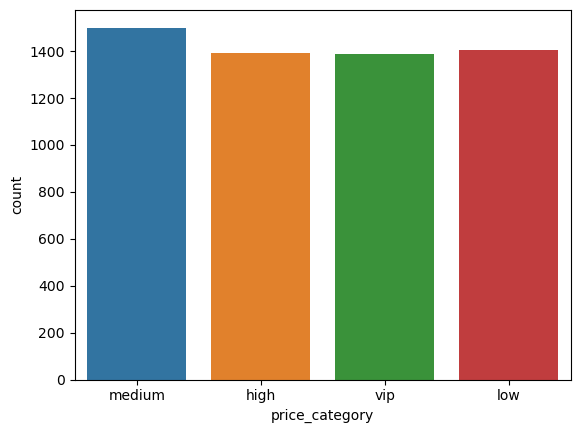

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='price_category', data = train_data)

plt.show()

In [26]:
train_data.head().T

0         1         2         3         4
latitude          42.36413  42.32844  42.32802  42.35867  42.35061
longitude        -71.02991 -71.09581 -71.09387 -71.06307 -71.08787
accommodates             2         2         4         2         2
beds                   1.0       1.0       2.0       1.0       1.0
price                125.0     135.0     179.0      91.0      86.0
minimum_nights          29         3         3        91        32
maximum_nights        1125        90       730       365      1125
availability_30         17         0         0        20        30
availability_60         17         0         0        20        60
availability_90         17         0        18        20        90
availability_365       271        87       107       237       365
price_category      medium      high      high    medium    medium

In [27]:
########################################################################
# Armamos una función de preparación
# con lo que hicimos en el data set original para train
########################################################################

def prepare_dataset(data):
  # 1) reemplazamos el texto de 'price' por su valor en float
  if(data['price'].dtype == 'object'):
    data['price'] = data['price'].str.replace("$" , "").str.replace("," , "").astype("float")
  #data['price'].describe()

  # 2) Elegimos las columnas a utilizar
  columns = ['latitude', 'longitude', 'accommodates',
         'beds', 'price', 'minimum_nights', 'maximum_nights',
         'availability_30', 'availability_60', 'availability_90', 'availability_365']
  data = data[columns]

  # 3) Completamos los NAN de 'beds'
  data.loc[:,('beds')] = data['beds'].fillna(1)

  # 4) Creamos categorias de precios - low, medium, high, vip
  def filter(x):
      if x <= 80:
          return 'low'
      if (x > 80 and x <= 129):
          return 'medium'
      if (x > 129 and x <= 200):
          return 'high'
      if x > 200:
          return 'vip'

  data['price_category'] = data['price'].apply(filter)

  return data

In [28]:
import numpy as np
import pandas as pd

# Cargamos nuevamente los dataset
train_data = pd.read_csv("train_data.csv", sep=';')
train_imgs = np.load("train_images.npy")
test_data = pd.read_csv("test_data.csv", sep=';')
test_imgs = np.load("test_images.npy")
train_data.shape, train_imgs.shape, test_data.shape, test_imgs.shape

((5684, 72), (5684, 224, 224, 3), (1421, 72), (1421, 224, 224, 3))

In [29]:
# Preparamos el dataset de train
train_data = prepare_dataset(train_data)
train_data.head().T

/var/folders/fj/6rc9gcxj7454r8gd3w4jdhtc0000gn/T/ipykernel_97445/3123933100.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_category'] = data['price'].apply(filter)


0         1         2         3         4
latitude          42.36413  42.32844  42.32802  42.35867  42.35061
longitude        -71.02991 -71.09581 -71.09387 -71.06307 -71.08787
accommodates             2         2         4         2         2
beds                   1.0       1.0       2.0       1.0       1.0
price                125.0     135.0     179.0      91.0      86.0
minimum_nights          29         3         3        91        32
maximum_nights        1125        90       730       365      1125
availability_30         17         0         0        20        30
availability_60         17         0         0        20        60
availability_90         17         0        18        20        90
availability_365       271        87       107       237       365
price_category      medium      high      high    medium    medium

In [30]:
# Preparamos el dataset de test
test_data = prepare_dataset(test_data)
test_data.head().T

/var/folders/fj/6rc9gcxj7454r8gd3w4jdhtc0000gn/T/ipykernel_97445/3123933100.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_category'] = data['price'].apply(filter)


0         1         2         3         4
latitude          42.34252  42.36031   42.3595  42.35323  42.35916
longitude        -71.08402 -71.06319 -71.06517 -71.06314 -71.06713
accommodates             2         5         4         6         5
beds                   2.0       3.0       3.0       2.0       4.0
price                 99.0     135.0     110.0     241.0      75.0
minimum_nights           1        29        29        29        29
maximum_nights         365       365       365       365       365
availability_30          7        15         0         0         0
availability_60         20        29         0         0         0
availability_90         50        29        24         0         0
availability_365       308        74       174         0       150
price_category      medium      high    medium       vip       low

In [31]:
# Ahora que ya tenemos ambos dataset
# procedemos a identificar las columnas Target
# que en nuestro caso serán
# para regresión: "price"
# para clasificación: "price_category"

In [32]:
columns_X = ['latitude', 'longitude', 'accommodates',
         'beds', 'minimum_nights', 'maximum_nights',
         'availability_30', 'availability_60', 'availability_90', 'availability_365']
X = train_data.loc[:,columns_X]
T = test_data.loc[:,columns_X]
y_reg = train_data.loc[:,'price']
t_reg = test_data.loc[:,'price']

y_cla = train_data.loc[:,'price_category']
t_cla = test_data.loc[:,'price_category']

X.shape, y_reg.shape, t_reg.shape, y_cla.shape, t_cla.shape

((5684, 10), (5684,), (1421,), (5684,), (1421,))

In [33]:
# Vamos a comenzar por la predicción de Regresión

In [34]:
# Creamos training y test para Regresión
# Create training and test sets
from sklearn.model_selection import train_test_split

SEED_GLOBAL = 42
TEST_SIZE_GLOBAL = 0.2

X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(X,
                                                    y_reg,
                                                    test_size=TEST_SIZE_GLOBAL,
                                                    random_state= SEED_GLOBAL)


In [35]:
# Usamos un scaler para intentar normalizar la data
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train_reg_scaler = scaler.fit_transform(X_train_reg)
X_val_reg_scaler   = scaler.transform(X_val_reg)
test_reg_scaler    = scaler.fit_transform(T)

In [36]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

2.11.0


In [37]:
tf.random.set_seed(SEED_GLOBAL)

model_reg = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_reg.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model_reg.fit(X_train_reg_scaler, y_train_reg, epochs=5)

Epoch 1/5


2024-04-20 09:31:10.505148: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


143/143 [==============================] - 0s 336us/step - loss: 181.3412 - mae: 181.3412
Epoch 2/5
143/143 [==============================] - 0s 286us/step - loss: 176.8912 - mae: 176.8912
Epoch 3/5
143/143 [==============================] - 0s 315us/step - loss: 172.4431 - mae: 172.4431
Epoch 4/5
143/143 [==============================] - 0s 306us/step - loss: 167.9886 - mae: 167.9886
Epoch 5/5
143/143 [==============================] - 0s 294us/step - loss: 163.5343 - mae: 163.5343


In [38]:
# Con un modelo super simple Obtuvimos como menor mae 163.5343

In [39]:
# Imports necesarios
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [40]:
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_network_decay_fnact_b1_mae(learning_rate, batch_size, num_epochs):

  # Implementamos la red empleando Keras
  model = Sequential() # Instancia de modelo API secuencial #(X)
  model.add(Dense(1))
  # Compilamos y entrenamos el modelo SGD
  print("[INFO]: Entrenando red neuronal...")
  opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(loss="mae", optimizer=opt, metrics=["mae"])

  # Entrenando la solución
  H = model.fit(X_train_reg_scaler, y_train_reg,
                validation_data=(X_val_reg_scaler, y_val_reg),
                epochs=num_epochs, batch_size=batch_size)  #(X)

  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(test_reg_scaler, batch_size=batch_size)  #(X)

  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["mae"], label="train_mae", linestyle='dashed', linewidth=4)
  plt.plot(np.arange(0, num_epochs), H.history["val_mae"], label="val_mae", linestyle='dashed', linewidth=4)
  plt.title("Training Loss and mae")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/mae")
  plt.legend()

[INFO]: Entrenando red neuronal...
Epoch 1/100
36/36 [==============================] - 0s 3ms/step - loss: 176.8015 - mae: 176.8015 - val_loss: 161.6707 - val_mae: 161.6707
Epoch 2/100
36/36 [==============================] - 0s 774us/step - loss: 165.5981 - mae: 165.5981 - val_loss: 150.5100 - val_mae: 150.5100
Epoch 3/100
36/36 [==============================] - 0s 748us/step - loss: 154.5022 - mae: 154.5022 - val_loss: 139.8460 - val_mae: 139.8460
Epoch 4/100
36/36 [==============================] - 0s 722us/step - loss: 144.3055 - mae: 144.3055 - val_loss: 130.3497 - val_mae: 130.3497
Epoch 5/100
36/36 [==============================] - 0s 717us/step - loss: 135.5734 - mae: 135.5734 - val_loss: 122.5971 - val_mae: 122.5971
Epoch 6/100
36/36 [==============================] - 0s 711us/step - loss: 128.5619 - mae: 128.5619 - val_loss: 116.5154 - val_mae: 116.5154
Epoch 7/100
36/36 [==============================] - 0s 723us/step - loss: 122.9561 - mae: 122.9561 - val_loss: 111.7132 

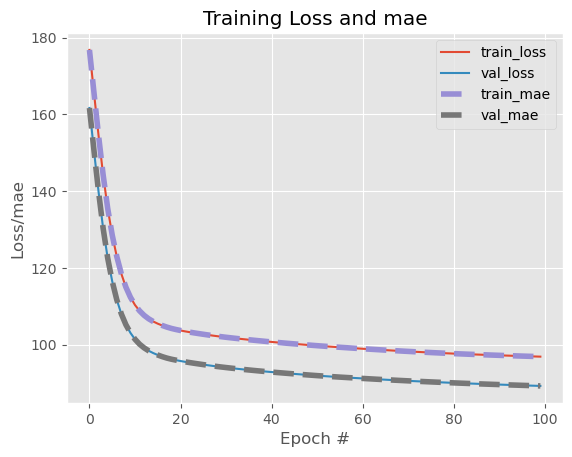

In [41]:
learning_rate = 0.1
num_epochs = 100
batch_size = 128
train_network_decay_fnact_b1_mae(learning_rate, batch_size, num_epochs)

In [42]:
# Con un modelo mas complejo, usando
# learning_rate = 0.1
# num_epochs = 100
# batch_size = 128
# obtenemos:
# para train un MAE de 96.8839
# para validación un MAE de 89.2549

# No tamos que a partir de 20 epocas (mas o menos) el valor empieza a decrecer
# más lentamente, aunque está por encima de 100 el MAE

In [43]:
# Vamos a comenzar por la predicción de Clasificación

In [44]:
# Creamos training y test para Clasificación
# Create training and test sets
from sklearn.model_selection import train_test_split

SEED_GLOBAL = 42
TEST_SIZE_GLOBAL = 0.2

X_train_cla, X_val_cla, y_train_cla, y_val_cla = train_test_split(X,
                                                    y_cla,
                                                    test_size=TEST_SIZE_GLOBAL,
                                                    random_state= SEED_GLOBAL)

In [45]:
# Usamos un scaler para intentar normalizar la data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras import utils

scaler  = MinMaxScaler()
X_train_cla_scaler = scaler.fit_transform(X_train_cla)
X_val_cla_scaler   = scaler.transform(X_val_cla)
test_cla_scaler    = scaler.fit_transform(T)

encoder = LabelEncoder()
encoder.fit(y_train_cla)
y_train_cla_enc = encoder.transform(y_train_cla)
y_train_cla_cat = utils.to_categorical(y_train_cla_enc)

y_val_cla_enc = encoder.transform(y_val_cla)
y_val_cla_cat = utils.to_categorical(y_val_cla_enc)

t_cla_enc = encoder.transform(t_cla)
t_cla_cat = utils.to_categorical(t_cla_enc)

In [46]:
X_train_cla_scaler.shape, y_train_cla_cat.shape

((4547, 10), (4547, 4))

In [47]:
tf.random.set_seed(SEED_GLOBAL)

model_cla = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(y_train_cla_cat.shape[1], activation = 'softmax') # Softmax for multi-class classification
])

# Compile the model
model_cla.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# Fit the model
model_cla.fit(X_train_cla_scaler, y_train_cla_cat, epochs=5)

Epoch 1/5
143/143 [==============================] - 0s 381us/step - loss: 1.2116 - accuracy: 0.4352
Epoch 2/5
143/143 [==============================] - 0s 352us/step - loss: 1.0987 - accuracy: 0.5065
Epoch 3/5
143/143 [==============================] - 0s 359us/step - loss: 1.0825 - accuracy: 0.5263
Epoch 4/5
143/143 [==============================] - 0s 341us/step - loss: 1.0633 - accuracy: 0.5408
Epoch 5/5
143/143 [==============================] - 0s 351us/step - loss: 1.0563 - accuracy: 0.5373


In [48]:
# Con un modelo super simple Obtuvimos un accuracy: 0.5373

In [49]:
# Imports necesarios
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [50]:
# definimos la función para entrenar nuestra red con los parámetros deseados
def train_network_decay_fnact_b1(activation_function, learning_rate, batch_size, num_epochs):

  # Implementamos la red empleando Keras
  model = Sequential() # Instancia de modelo API secuencial #(X)
  model.add(Dense(100, activation=activation_function)),
  model.add(Dense(100, activation=activation_function)),
  model.add(Dense(y_train_cla_cat.shape[1], activation="softmax"))
  # Compilamos y entrenamos el modelo
  print("[INFO]: Entrenando red neuronal...")
  opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=opt, metrics=["accuracy"])

  # Entrenando la solución
  H = model.fit(X_train_cla_scaler, y_train_cla_cat,
                validation_data=(X_val_cla_scaler, y_val_cla_cat),
                epochs=num_epochs, batch_size=batch_size)  #(X)

  # Evaluando el modelo de predicción con las imágenes de test
  print("[INFO]: Evaluando red neuronal...")
  predictions = model.predict(test_cla_scaler, batch_size=batch_size)  #(X)
  print(classification_report(t_cla_cat.argmax(axis=1), predictions.argmax(axis=1)))

  # Muestro gráfica de accuracy y losses
  plt.style.use("ggplot")
  plt.figure()
  plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
  plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend()

In [51]:
activation_function = tf.nn.relu
learning_rate = 0.01
num_epochs = 100
batch_size = 128
train_network_decay_fnact_b1(activation_function, learning_rate, batch_size, num_epochs)

[INFO]: Entrenando red neuronal...
Epoch 1/100
36/36 [==============================] - 0s 2ms/step - loss: 1.2314 - accuracy: 0.4258 - val_loss: 1.0852 - val_accuracy: 0.5163
Epoch 2/100
36/36 [==============================] - 0s 994us/step - loss: 1.0864 - accuracy: 0.5208 - val_loss: 1.0441 - val_accuracy: 0.5383
Epoch 3/100
36/36 [==============================] - 0s 970us/step - loss: 1.0549 - accuracy: 0.5454 - val_loss: 1.0437 - val_accuracy: 0.5286
Epoch 4/100
36/36 [==============================] - 0s 1ms/step - loss: 1.0307 - accuracy: 0.5509 - val_loss: 1.0159 - val_accuracy: 0.5506
Epoch 5/100
36/36 [==============================] - 0s 984us/step - loss: 1.0252 - accuracy: 0.5503 - val_loss: 1.0691 - val_accuracy: 0.5312
Epoch 6/100
36/36 [==============================] - 0s 990us/step - loss: 1.0294 - accuracy: 0.5498 - val_loss: 1.0237 - val_accuracy: 0.5664
Epoch 7/100
36/36 [==============================] - 0s 995us/step - loss: 1.0174 - accuracy: 0.5465 - val_loss

In [52]:
# Con un modelo complejo Obtuvimos un accuracy: 0.68
# Por lo que vemos el modelo a partir de mas o menos 20 epocas
# deja de mejorar las perdidas en validación
# pero sigue mejorando el accuracy

In [53]:
# Ahora pasamos a crear un modelo que analizes imáges

In [54]:
train_imgs.shape, test_imgs.shape, y_cla.shape, t_cla.shape

((5684, 224, 224, 3), (1421, 224, 224, 3), (5684,), (1421,))

In [55]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils

# Pasamos a etiquetas one-hot encoded #(X)
encoder = LabelEncoder()
encoder.fit(y_cla)
y_cla_enc = encoder.transform(y_cla)
y_train = utils.to_categorical(y_cla_enc)

t_cla_enc = encoder.transform(t_cla)
y_te = utils.to_categorical(t_cla_enc)

In [56]:
from sklearn.model_selection import train_test_split

SEED_GLOBAL = 42
TEST_SIZE_GLOBAL = 0.1

x_train = train_imgs
x_te = test_imgs

# Dividimos el conjunto de training en training y validation #(X)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=TEST_SIZE_GLOBAL,
                                                    random_state= SEED_GLOBAL)


In [57]:
# Verificamos valores de las imágens
x_tr[0].shape, x_tr.min(), x_tr.max()

((224, 224, 3), 0.0, 1.0)

In [58]:
# Vemos que la dimensión de la imágen es 224 x 224 y ya están escaladas
# Siend 224x224 = 50176

In [59]:
224*224*3

150528

In [60]:
# Imports necesarios
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Hiper-parámetros de nuestra red
learning_rate = 0.0001
num_epochs = 100
batch_size = 128

# Implementamos la red empleando Keras
model = Sequential() # Instancia de modelo API secuencial #(X)
model.add(Flatten()) # Estiramos los datos en forma de vector como entrada a nuestro Perceptrón Simple #(X)
model.add(Dense(y_tr.shape[1], input_shape=(150528,), activation="softmax")) # Construimos nuestro Perceptrón simple con una única capa Dense #(X)

print("[INFO]: Entrenando red neuronal...")
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=opt, metrics=["accuracy"])

# Entrenando la solución
H = model.fit(x_tr, y_tr, validation_data=(x_val, y_val), epochs=num_epochs, batch_size=batch_size)  #(X)

# Evaluando el modelo de predicción con las imágenes de test
print("[INFO]: Evaluando red neuronal...")
predictions = model.predict(x_te, batch_size=batch_size)  #(X)
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

model_img_1d = model

[INFO]: Entrenando red neuronal...
Epoch 1/100
40/40 [==============================] - 4s 90ms/step - loss: 3.0084 - accuracy: 0.2600 - val_loss: 1.5178 - val_accuracy: 0.3339
Epoch 2/100
40/40 [==============================] - 3s 83ms/step - loss: 1.4794 - accuracy: 0.3009 - val_loss: 1.4160 - val_accuracy: 0.3111
Epoch 3/100
40/40 [==============================] - 4s 100ms/step - loss: 1.3835 - accuracy: 0.3382 - val_loss: 1.3879 - val_accuracy: 0.3304
Epoch 4/100
40/40 [==============================] - 4s 107ms/step - loss: 1.3935 - accuracy: 0.3494 - val_loss: 1.4893 - val_accuracy: 0.3005
Epoch 5/100
40/40 [==============================] - 6s 152ms/step - loss: 1.3193 - accuracy: 0.3859 - val_loss: 1.6013 - val_accuracy: 0.3357
Epoch 6/100
40/40 [==============================] - 6s 139ms/step - loss: 1.3406 - accuracy: 0.3949 - val_loss: 1.3867 - val_accuracy: 0.3409
Epoch 7/100
40/40 [==============================] - 6s 144ms/step - loss: 1.3135 - accuracy: 0.4072 - val_lo

In [61]:
# Obtuvimos un accuracy: 0.82, que es superior al 0.68 obtenido con el modelo que usa texto
# El modelo tiene un comportamiendo en saltos
# Igualmente, el modelo sigue intentando mejorar según pasas las épocas.
# Utilizando estos parámetros
# activation_function = tf.nn.relu
# learning_rate = 0.0001
# num_epochs = 100
# batch_size = 128
# De los cuales, el único que se modificó respecto al modelo con texto
# es learning_rate, que paso de 0.01 a 0.0001.
# Ya que con un valor mayor, el comportamiendo herrante es más evidente
# y se obtiene una menor accuracy

# 2. Modelo 2D/imágenes:

Emplear al menos 1 red neuronal profunda basada en capas
convolucionales o capas de atención (Transformers) para realizar la predicción a
partir de imágenes.

- a. Es importante destacar que el alumno debe priorizar el empleo de
arquitecturas pre-entrenadas, congelando la parte ya entrenada del modelo y
obteniendo embeddings que le permitan afrontar el problema de manera ágil
empleando luego un clasificador basado en capas Dense de su elección.

- b. Tan sólo en el caso de que el alumno disponga de tiempo, se le anima a que
de manera opcional entrene por completo un modelo 2D. Sin embargo, **se
recomienda completar primero toda la práctica antes de abordar este punto**.

In [62]:
# Data augmentation

# importamos lo necesario
import tensorflow as tf
from tensorflow.keras import callbacks,optimizers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np

In [63]:
#Datos a utilizar
# imagenes
x_tr.shape, x_val.shape, x_te.shape, y_tr.shape, y_val.shape, y_te.shape

((5115, 224, 224, 3),
 (569, 224, 224, 3),
 (1421, 224, 224, 3),
 (5115, 4),
 (569, 4),
 (1421, 4))

In [64]:
# primero cargamos nuestro dataset y lo redimensionamos a las dimensiones mínimas
# permitidas por la VGG16 -> (48, 48, 3)

input_shape = (48, 48, 3)

# resize train set
X_train_resized = []
for img in x_tr:
  X_train_resized.append(np.resize(img, input_shape))

X_train_resized = np.array(X_train_resized)
print(X_train_resized.shape)

# resize validation set
X_val_resized = []
for img in x_val:
  X_val_resized.append(np.resize(img, input_shape))

X_val_resized = np.array(X_val_resized)
print(X_val_resized.shape)

# resize test set
X_test_resized = []
for img in x_te:
  X_test_resized.append(np.resize(img, input_shape))

X_test_resized = np.array(X_test_resized)
print(X_test_resized.shape)

(5115, 48, 48, 3)
(569, 48, 48, 3)
(1421, 48, 48, 3)


In [65]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# data generators => hacemos data augmentation
print('Usando real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen_train = ImageDataGenerator(
    rotation_range=15, # rotar de manera aleatoria imágenes en el rango [0º, 15º]
    width_shift_range=0.1, # desplazar la imagen horizontalmente un 10%
    height_shift_range=0.1, # idem en vertical
    zoom_range=0.1, # rango de zoom aleatorio
    horizontal_flip=True # flip imagenes en el ancho
)
datagen_train.fit(X_train_resized)

datagen_val = ImageDataGenerator()
datagen_val.fit(X_val_resized)

datagen_test = ImageDataGenerator()
datagen_test.fit(X_test_resized)

Usando real-time data augmentation.


In [66]:
# permitimos que, además de la etapa de clasificación, se entrenen también el
# último bloque convolucional
for layer in base_model.layers:
  layer.trainable = False
  if layer.name == "block5_conv3":
    layer.trainable = True

learning_rate = 0.0001

# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(y_tr.shape[1], activation='softmax', name='predictions')(x)
model = Model(base_model.input, x)

# compilamos el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# vemos la nueva estructura del modelo
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [67]:
X_train_resized.shape

(5115, 48, 48, 3)

In [68]:
# comenzamos con el entrenamiento
epochs = 100
batch_size = 128

train_steps_per_epoch = X_train_resized.shape[0] / batch_size
val_steps_per_epoch = X_val_resized.shape[0] / batch_size

# entrenamos con el datagenerator (nos permite aplicar transformaciones en tiempo real)
model.fit(datagen_train.flow(X_train_resized, y_tr, batch_size),
                    steps_per_epoch=train_steps_per_epoch,
                    epochs=epochs,
                    validation_data=datagen_test.flow(X_val_resized, y_val, batch_size=batch_size),
                    validation_steps=val_steps_per_epoch,
                    workers=8)

# comprobamos el accuracy y el loss en el test set
scores =  model.evaluate(X_test_resized, y_te, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/100


python(99592) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


39/39 [==============================] - 36s 877ms/step - loss: 1.4394 - accuracy: 0.2716 - val_loss: 1.3820 - val_accuracy: 0.2513
Epoch 2/100
39/39 [==============================] - 35s 873ms/step - loss: 1.3903 - accuracy: 0.2935 - val_loss: 1.3790 - val_accuracy: 0.2900
Epoch 3/100
39/39 [==============================] - 937s 24s/step - loss: 1.3709 - accuracy: 0.3200 - val_loss: 1.3791 - val_accuracy: 0.2794
Epoch 4/100
39/39 [==============================] - 931s 24s/step - loss: 1.3684 - accuracy: 0.3097 - val_loss: 1.3830 - val_accuracy: 0.2742
Epoch 5/100
39/39 [==============================] - 280s 7s/step - loss: 1.3657 - accuracy: 0.3208 - val_loss: 1.3815 - val_accuracy: 0.2794
Epoch 6/100
39/39 [==============================] - 30s 748ms/step - loss: 1.3613 - accuracy: 0.3189 - val_loss: 1.3770 - val_accuracy: 0.2847
Epoch 7/100
39/39 [==============================] - 32s 799ms/step - loss: 1.3547 - accuracy: 0.3257 - val_loss: 1.3759 - val_accuracy: 0.2671
Epoch 8/

In [69]:
# Para un modelo 2D que usa datos pre-entrenados
# obtuvimos un Accuracy de 0.41 para TEST y un 0.55 para TRAIN

In [70]:
model_img_2d = model

In [71]:
model_img_1d.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 4)                 602116    
                                                                 
Total params: 602,116
Trainable params: 602,116
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_img_2d.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

# 3. Estrategia late-fusion:

Empleo de 1 modelo DL/ML que sea capaz de combinar las predicciones realizadas por un modelo 1D y por un modelo 2D para realizar a su vez la predicción.

In [73]:
# Buscamos los valores de las categorias segun los pesos
t_cla[:5], t_cla_cat[:5]

(0    medium
 1      high
 2    medium
 3       vip
 4       low
 Name: price_category, dtype: object,
 array([[0., 0., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.]], dtype=float32))

In [74]:
# medium - 2
# high   - 0
# vip    - 3
# low    - 1
precios_categorias = ['high', 'low', 'medium', 'vip']

In [75]:
# Función para realizar predicciones con los modelos y fusionarlas con votación mayoritaria
def fusionar_predicciones(imgs, model_1D, model_2D, batch_size=128):
    # Obtener las predicciones de los dos modelos
    predicciones_modelo_1 = model_1D.predict(imgs, batch_size=batch_size)

    # resize image
    input_shape = (48, 48, 3)
    # resize train set
    X_test_resized = []
    for img in imgs:
        X_test_resized.append(np.resize(img, input_shape))

    X_test_resized = np.array(X_test_resized)
    
    predicciones_modelo_2 = model_2D.predict(X_test_resized)
    
    # Fusionar las predicciones utilizando votación mayoritaria
    predicciones_fusionadas = (predicciones_modelo_1 + predicciones_modelo_2) / 2.0

    message = f"predicion 1D {predicciones_modelo_1}\npredicion 2D {predicciones_modelo_2}\nprediciones {predicciones_fusionadas}"
    
    clase_predicha = np.argmax(predicciones_fusionadas, axis=1)
    
    return clase_predicha, message

1/1 [==============================] - 0s 30ms/step


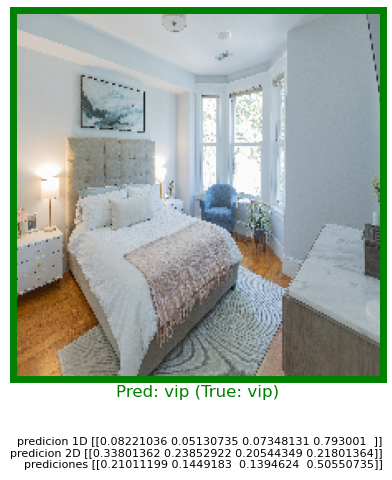

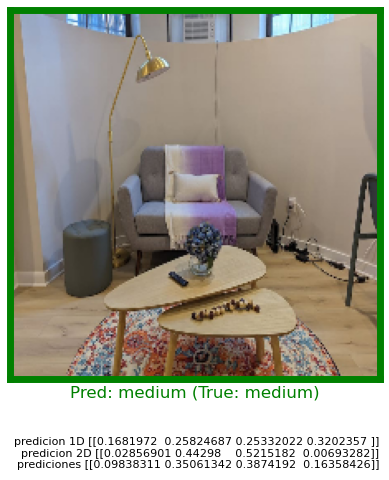

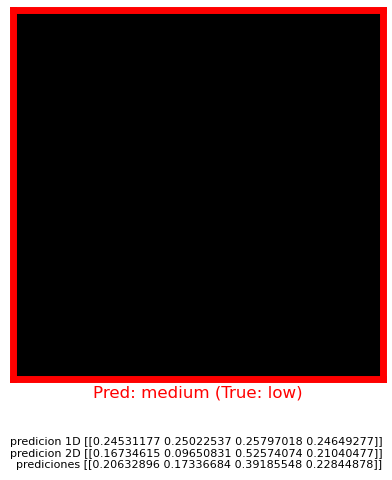

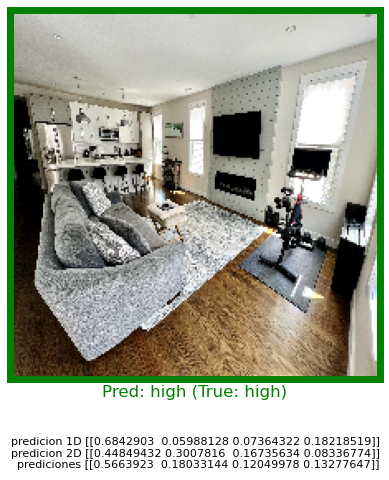

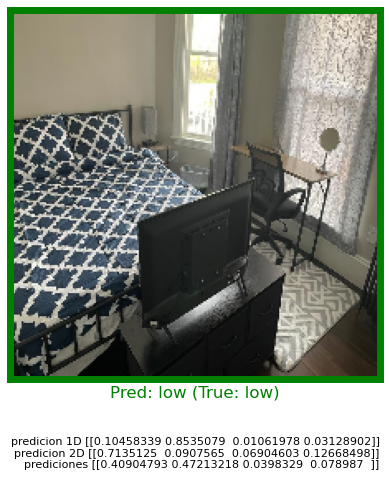

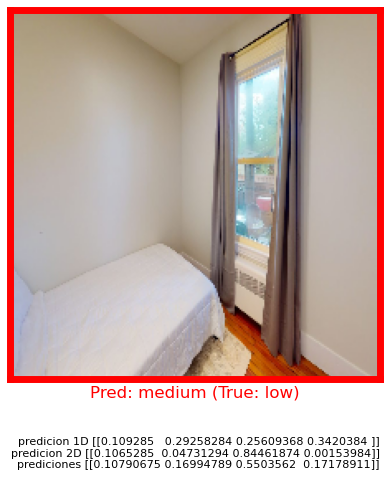

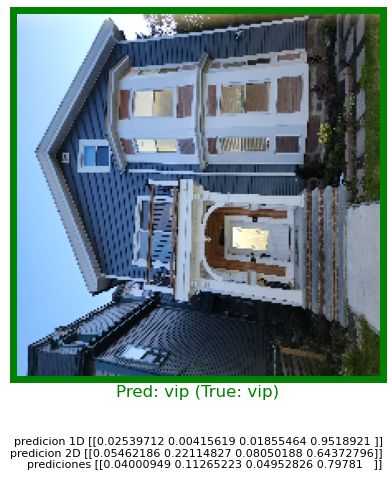

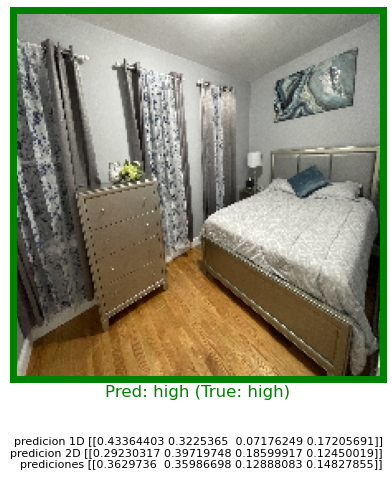

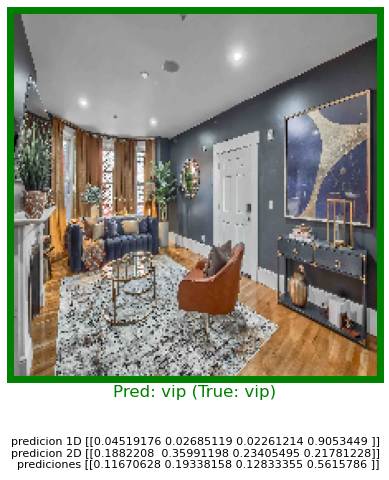

In [81]:
import matplotlib.pyplot as plt

for i in range(10):
    # Imagen random de prueba
    index = np.random.randint(0, x_te.shape[0] -1)
    imagen = x_te[[index]]

    # Realizar la predicción fusionada
    clase_predicha, message = fusionar_predicciones(imagen, model_img_1d, model_img_2d)
    pred_label = precios_categorias[clase_predicha[0]]
    true_label = t_cla[index]

    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    plt.figure(i+1)
    ax = plt.axes()
    
    plt.xlabel("Pred: {} (True: {})".format(pred_label,
                        true_label),
                color=color) # set the color to green or red
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(5)
        ax.spines[axis].set_color(color)
    
    # Hide grid lines
    ax.grid(False)
    plt.xticks([])
    plt.yticks([])

    ax.annotate(message,
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=8)

    plt.imshow(imagen[0])
   

# 4. Estrategia early-fusion:

Empleo de 1 modelo DL/ML que sea capaz de combinar los embeddings obtenidos por un modelo 1D y por un modelo 2D para realizar a su vez la
predicción.

In [77]:
from keras.models import load_model
from keras.layers import Concatenate, Input
from keras.models import Model

modelo_img_1d = model_img_1d
modelo_img_2d = model_img_2d

# Congelar las capas de los modelos
for capa in modelo_img_1d.layers:
    capa.trainable = False

for capa in modelo_img_2d.layers:
    capa.trainable = False

# Definir capas de entrada
input_img_1d = Input(shape=(224, 224, 3))
input_img_2d = Input(shape=(48, 48, 3))

# Obtener las salidas de los modelos preentrenados
output_img_1d = modelo_img_1d(input_img_1d)
output_img_2d = modelo_img_2d(input_img_2d)

# Armamos la salida promediando
fusion_output = [output_img_1d, output_img_2d]

# Definir el modelo fusionado
fusion_model = Model(inputs=[input_img_1d, input_img_2d], outputs=fusion_output)

In [78]:
fusion_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 sequential_4 (Sequential)      (None, 4)            602116      ['input_2[0][0]']                
                                                                                                  
 model (Functional)             (None, 4)            15231692    ['input_3[0][0]']          

In [79]:
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess_input


def early_fusion_predicciones(imgs):
    # resize image
    input_shape = (48, 48, 3)
    # resize train set
    X_test_resized = []
    for img in imgs:
    #    X_test_resized.append(np.resize(img, input_shape))
        unique_img = img
        X_test_resized = np.resize(img, input_shape)

    img_1d_array = np.expand_dims(unique_img, axis=0)
    img_1d = efficientnet_preprocess_input(img_1d_array)

    img_2d_array = np.expand_dims(X_test_resized, axis=0)
    img_2d = efficientnet_preprocess_input(img_2d_array)

    # Realizar la predicción con el modelo de fusión
    predictions = fusion_model.predict([img_1d, img_2d], batch_size=128)
    output_img_1d = predictions[0]
    output_img_2d = predictions[1]
    prediction =(output_img_1d + output_img_2d) / 2.0

    message = f"predicion 1D {output_img_1d}\npredicion 2D {output_img_2d}\nprediciones {prediction}"
    

    # Obtener la etiqueta predicha
    predicted_label = np.argmax(prediction)

    return predicted_label, message

1/1 [==============================] - 0s 31ms/step


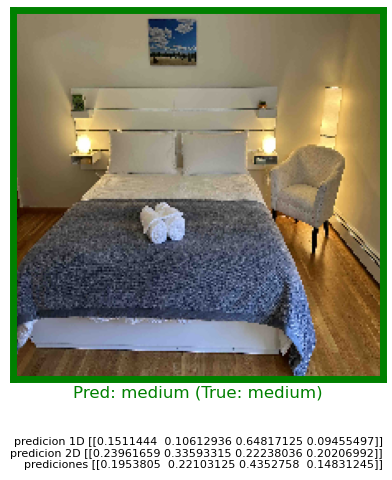

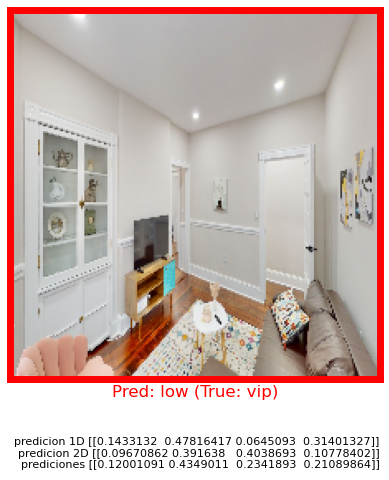

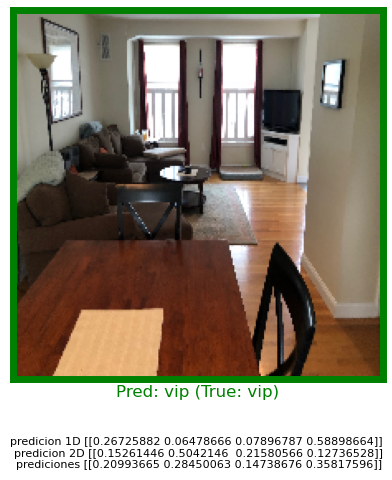

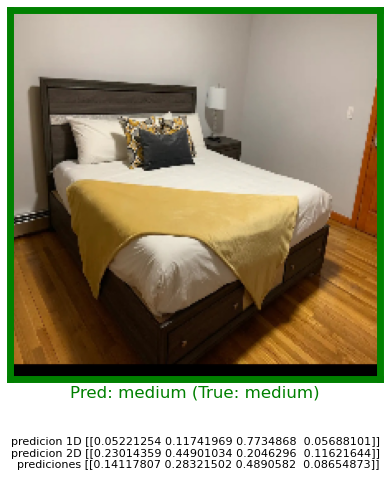

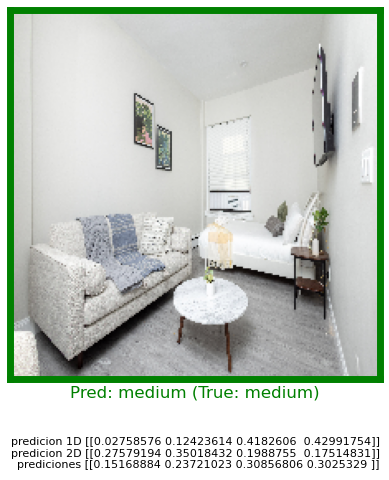

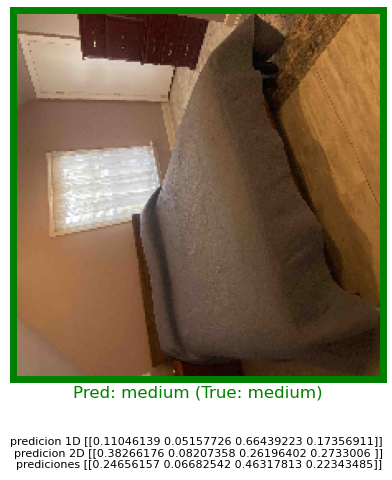

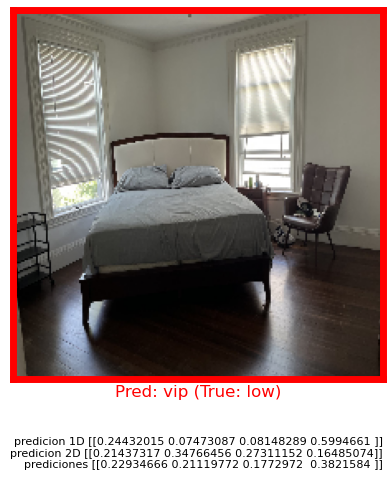

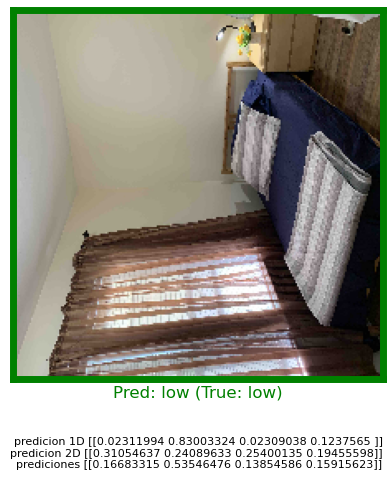

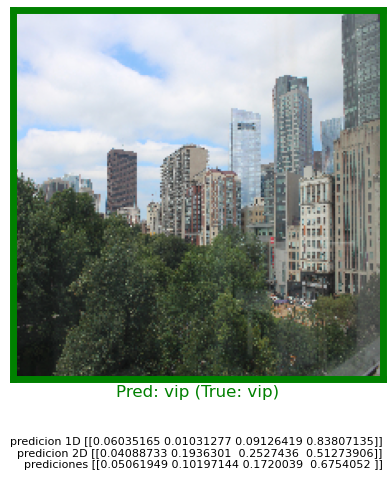

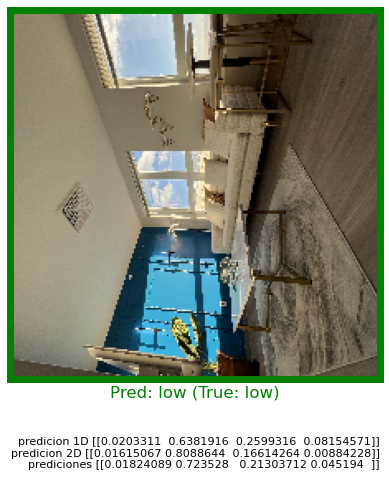

In [82]:
import matplotlib.pyplot as plt

for i in range(10):
    # Imagen random de prueba
    index = np.random.randint(0, x_te.shape[0] -1)
    imagen = x_te[[index]]

    # Realizar la predicción fusionada
    clase_predicha, message = early_fusion_predicciones(imagen)

    pred_label = precios_categorias[clase_predicha]
    true_label = t_cla[index]

    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    plt.figure(i+1)
    ax = plt.axes()
    
    plt.xlabel("Pred: {} (True: {})".format(pred_label,
                        true_label),
                color=color) # set the color to green or red
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(5)
        ax.spines[axis].set_color(color)
    
    # Hide grid lines
    ax.grid(False)
    plt.xticks([])
    plt.yticks([])

    ax.annotate(message,
            xy = (1.0, -0.2),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=8)

    plt.imshow(imagen[0])